<a href="https://colab.research.google.com/github/Blutronics/BakeryAssociationRule/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df=pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [125]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [126]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [127]:
dfti.TransactionNo.groupby(dfti.Items)

In [128]:
#dfti=pd.get_dummies(dfti,drop_first=True)
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [129]:
items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [130]:
all_items=[i for item in items for i in item]
#all_items


In [131]:
from collections import Counter

In [132]:
item_frequencies=Counter(all_items)
#item_frequencies

In [133]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [134]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [135]:
import matplotlib.pyplot as plt

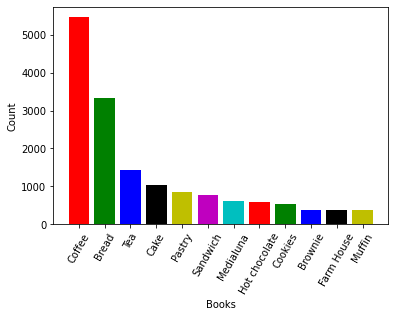

In [136]:
plt.bar(height = itemfreqs[0:12], x = list(range(0, 12)), color = list('rgbkymc'))
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.xlabel("Books")
plt.ylabel("Count")
plt.show()

In [137]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
9460,[Bread]
9461,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,"[Coffee, Pastry]"


In [138]:
item_series.columns=["transactions"]

In [153]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [141]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

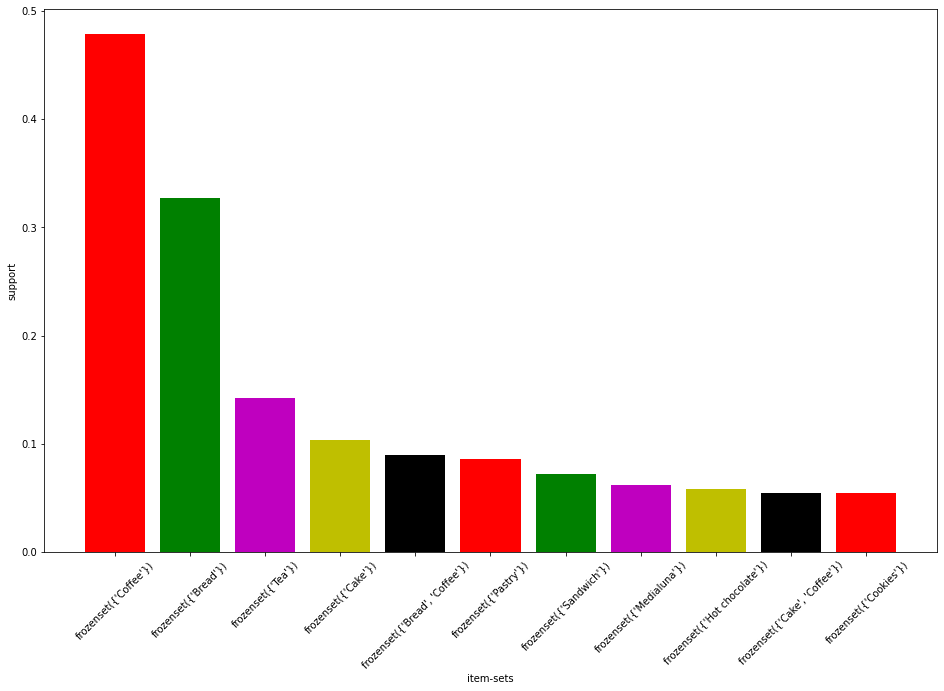

In [142]:
plt.figure(figsize=(16, 10))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color =list('rgmyk'))
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [143]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
39,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
30,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
31,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
15,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
14,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
33,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
32,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


In [144]:
df.Daypart.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [145]:

new_df=df[['TransactionNo','Daypart', 'DayType']]
new_df

,TransactionNo,Daypart,DayType
0,1,Morning,Weekend
1,2,Morning,Weekend
2,2,Morning,Weekend
3,3,Morning,Weekend
4,3,Morning,Weekend
...,...,...,...
20502,9682,Afternoon,Weekend
20503,9682,Afternoon,Weekend
20504,9683,Afternoon,Weekend
20505,9683,Afternoon,Weekend


In [146]:
new_df['PartType']=new_df['Daypart']+ ' ' + new_df['DayType']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
2,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
4,3,Morning,Weekend,Morning Weekend


In [147]:
days=[]
for i in new_df.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)

#days

In [148]:
df_drop = new_df.drop_duplicates()
df_drop

,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
6,4,Morning,Weekend,Morning Weekend
7,5,Morning,Weekend,Morning Weekend
...,...,...,...,...
20495,9680,Afternoon,Weekend,Afternoon Weekend
20496,9681,Afternoon,Weekend,Afternoon Weekend
20500,9682,Afternoon,Weekend,Afternoon Weekend
20504,9683,Afternoon,Weekend,Afternoon Weekend


In [149]:
days=[]
for i in df_drop.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)



In [150]:
df_drop = df_drop.reset_index(drop=True)

In [152]:
df_dummy['PartType']=df_drop.PartType
df_dummy.head() 
#Dataframe for dummy variables and Daytype/DayType

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
